In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
from Encoder import ScalarEncoder

In [3]:
enc = ScalarEncoder(out_size=22, w=3, min_val=2.5, max_val=97.5, clipInput=True, forced=True)

In [4]:
print("3 =", enc.encode_vanilla(3))
print("4 =", enc.encode_vanilla(4))
print("5 =", enc.encode_vanilla(5))


3 = [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
4 = [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
5 = [ 0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


In [5]:
# Encode maxval
print("100  =", enc.encode(100))
# See that any larger number gets the same encoding
print("1000 =", enc.encode(1000))
print(enc.clipInput)

100  = [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
1000 = [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
True


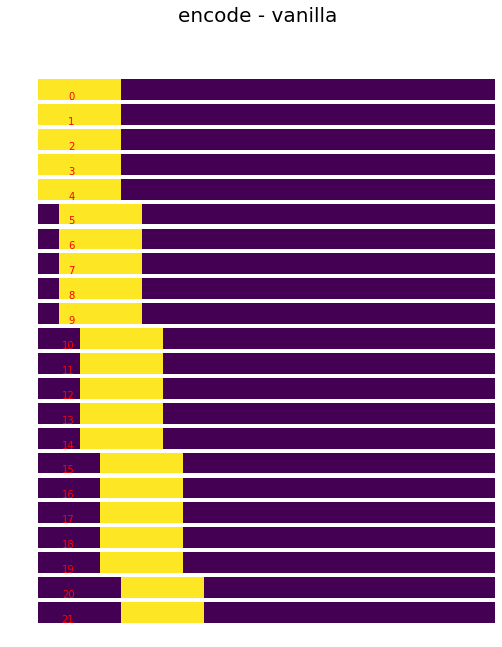

In [6]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("encode - vanilla", fontsize=20)
num = enc.out_size
for i in range(num):
    data = enc.encode_vanilla(i).reshape(1,enc.out_size)
    ax = plt.subplot(num,1,i+1)
    plt.imshow(data)
    bounds = list(ax.get_position().bounds)
    x, y, cx, cy = bounds
    plt.axis('off')
    fig.text(x + .05, y, i, fontsize=10, horizontalalignment='right', color= 'red')

In [7]:
#DataGet
#collect or create the data that will be encoded.
dataset = np.random.rand(10,1)

In [8]:
#Encoder: 
#input: dataset
#output: E(x_t)


#encoder = ScalarEncoder(out_size=22, w=3, min_val=2.5, max_val=97.5, clipInput=True, forced=True)

def encode(encoder, data):
    Ex_t = encoder.encode_vanilla(data).reshape(1,encoder.out_size)
    return Ex_t

In [9]:
# Spatial Pool Implementation
#input: E(x_t)
#output: A(x_t)
import _SP3
def Spatial_Pool(Ex_t):
    #import spatial_pooler_num 
#     sp = SpatialPooler(inputDimensions=(15,),
#                    columnDimensions=(4,),
#                    potentialRadius=15,
#                    numActiveColumnsPerInhArea=1,
#                    globalInhibition=True,
#                    synPermActiveInc=0.03,
#                    potentialPct=1.0)
    
#     for column in xrange(4):
#     connected = np.zeros((15,), dtype="int")
#     sp.getConnectedSynapses(column, connected)
#     print(connected)
    sp = SP3.SpatialPooler(encoder.out_size, columns=512, perm_conn=.6, minOver=encoder.w/5, potential_rate=0.9)
    
    
    return Ax_t

In [11]:
output = np.zeros((4,), dtype="int")
sp.compute(cat, learn=True, activeArray=output)
print(output)

NameError: name 'sp' is not defined

In [ ]:
#Sequence Memory 
#input: A(x_t)
#output:Pi(x_t)
import _TM
def Sequence_Memory(Ax_t):
    return Pi

In [ ]:
#Prediction Error
#input: A(x_t), Pi(x_t)
#output: S_t

#calculate the prediction error from the difference between current actual and previous prediction
class prediction_error:
    from numpy import  linalg as LA
    def __init__(self, prev_prediction = 0):
        prev_predict = prev_prediction
    def Prediction_Error(self, Ax_t, Pi):        
        S_t = (1 - (prev_predict * Ax_t)/LA.norm(Ax_t))
        prev_Pi = Pi #set prev prediction to current prediction ready for next step
        return S_t


In [ ]:
#Anomaly Likelyhood
#input: S_t
#output: L_t
def Anomaly_Likelyhood(S_t):
    
    return L_t

In [ ]:
#Combine it all Together
encoder = ScalarEncoder(out_size=22, w=3, min_val=2.5, max_val=97.5, clipInput=True, forced=True)

for data in dataset:
    print(data)
    Ex_t = encode(encoder,data)
    Ax_t = Spatial_Pool(Ex_t)
    Pi = Sequence_Memory(Ax_t)
    S_t = Prediction_Error(Ax_t, Pi)
    L_t = Anomaly_Likelyhood(S_t)
    print(L_t)
